<a href="https://colab.research.google.com/github/faatihrifqi/Predict-House-Price/blob/master/Prediksi_Harga_Rumah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Berikut merupakan soal UTS pada pelatihan Machine Learning DIGITALENT Kominfo yang di adakan di Universitas Telkom.

# Prediksi Harga Rumah di King County, USA

## Overview

King County adalah sebuah county (kabupaten) di USA yang terletak di negara
bagian Washington DC. King County adalah salah satu dari tiga county Washington
yang termasuk dalam area metropolitan Seattle-Tacoma-Bellevue. Pada 2011, King
County adalah county berpenghasilan tertinggi ke-86 di Amerika Serikat.
King County memiliki bangunan rumah yang memiliki beberapa fitur utama, seperti:
jumlah kamar tidur, jumlah kamar mandi, luas area rumah, dll. Tentu fitur-fitur utama
tersebut akan mempengaruhi harga rumah tersebut. Survey dilakukan dan datanya,
termasuk harga, dikumpulkan dan tersimpan dalam sebuah dataset.

Berikut fitur-fitur dan penjelasannya:
*   **id** : a notation for a house
*   **date** : Date house was sold
*   **price** : Price is prediction target
*   **bedrooms** : Number of Bedrooms/House
*   **bathrooms** : Number of bathrooms/House
*   **sqft_living** : square footage of the home
*   **sqft_lot** : square footage of the lot
*   **floors** : Total floors (levels) in house
*   **waterfront** : House which has a view to a waterfront
*   **view** : Has been viewed
*   **condition** : How good the condition is ( Overall )
*   **grade** : overall grade given to the housing unit, based on King County grading system
*   **sqft_above** : square footage of house apart from basement
*   **sqft_basement** : square footage of the basement
*   **yr_built** : Built Year
*   **yr_renovated** : Year when house was renovated
*   **zipcode** : zip
*   **lat** : Latitude coordinate
*   **long** : Longitude coordinate
*   **sqft_living15** : Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area

## Import library

In [0]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

## Load data

In [2]:
!wget -O kc_house_data.csv https://raw.githubusercontent.com/Jonasyao/Machine-Learning-Specialization-University-of-Washington-/master/Regression/Assignment_four/kc_house_data.csv

--2019-08-30 12:30:12--  https://raw.githubusercontent.com/Jonasyao/Machine-Learning-Specialization-University-of-Washington-/master/Regression/Assignment_four/kc_house_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 368640 (360K) [text/plain]
Saving to: ‘kc_house_data.csv’

kc_house_data.csv   100%[===================>] 360.00K  --.-KB/s    in 0.05s   

2019-08-30 12:30:13 (7.09 MB/s) - ‘kc_house_data.csv’ saved [368640/368640]



In [3]:
df = pd.read_csv("kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340.0,5650.0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690.0,7639.0
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720.0,8062.0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360.0,5000.0
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800.0,7503.0


Dari 5 contoh data teratas terlihat bahwa dataset memiliki kolom "date" yang akan kita jadikan sebagai index

In [4]:
df = pd.read_csv("kc_house_data.csv", index_col="date", parse_dates=True)
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
date,,,,,,,,,,,,,,,,,,,,
2014-10-13,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340.0,5650.0
2014-12-09,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690.0,7639.0
2015-02-25,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720.0,8062.0
2014-12-09,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360.0,5000.0
2015-02-18,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800.0,7503.0


Kita hapus saja kolom id, karena tidak memberikan informasi apapun

In [0]:
df.drop(["id"], axis=1, inplace=True)

Sebagai *sense* awal, kita bisa plot persebaran harga rumah berdasarkan latitude dan longitude

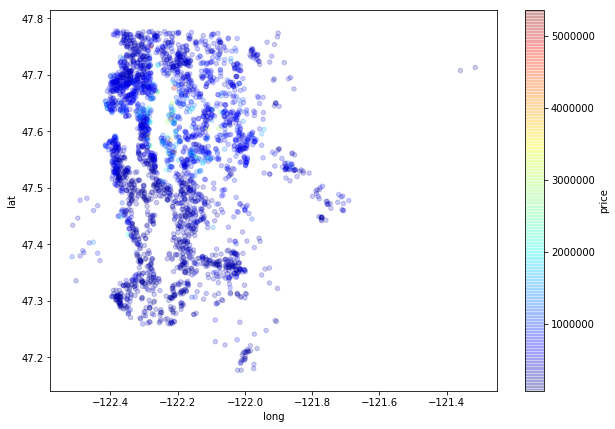

In [6]:
df.plot(kind="scatter", x="long", y="lat", alpha=0.2, figsize=(10,7),
    c="price", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)

## Preprocessing Data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3165 entries, 2014-10-13 to 2014-06-20
Data columns (total 19 columns):
price            3165 non-null float64
bedrooms         3165 non-null int64
bathrooms        3165 non-null float64
sqft_living      3165 non-null int64
sqft_lot         3165 non-null int64
floors           3165 non-null float64
waterfront       3165 non-null int64
view             3165 non-null int64
condition        3165 non-null int64
grade            3165 non-null int64
sqft_above       3165 non-null int64
sqft_basement    3165 non-null int64
yr_built         3165 non-null int64
yr_renovated     3165 non-null int64
zipcode          3165 non-null int64
lat              3165 non-null float64
long             3165 non-null float64
sqft_living15    3164 non-null float64
sqft_lot15       3164 non-null float64
dtypes: float64(7), int64(12)
memory usage: 494.5 KB


Fitur-fitur pada dataset hanya terdiri dari tipe data int dan float yang mana berarti kita tidak perlu melalukan encoding. 

Selanjutnya kita cek apakah ada data yang kosong pada dataset

In [8]:
df.columns[df.isnull().any()]

Index(['sqft_living15', 'sqft_lot15'], dtype='object')

Ternyata ada data kosong pada kolom sqft_living15 dan sqft_lot15. Kita coba lihat persebaran data kosongnya

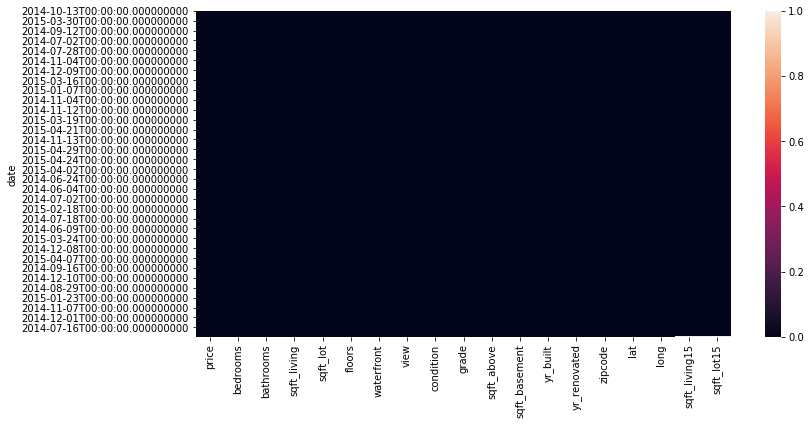

In [9]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull())
plt.show()

Kita bisa melihat persentase jumlah data kosong terhadap keseluruhan data

In [10]:
Isnull = df.isnull().sum() / len(df)*100
Isnull = Isnull[Isnull > 0]
Isnull.sort_values(inplace=True, ascending=False)
Isnull

sqft_lot15       0.031596
sqft_living15    0.031596
dtype: float64

Kita juga bisa menampilkan persentase jumlah data kosong dalam bentuk grafik

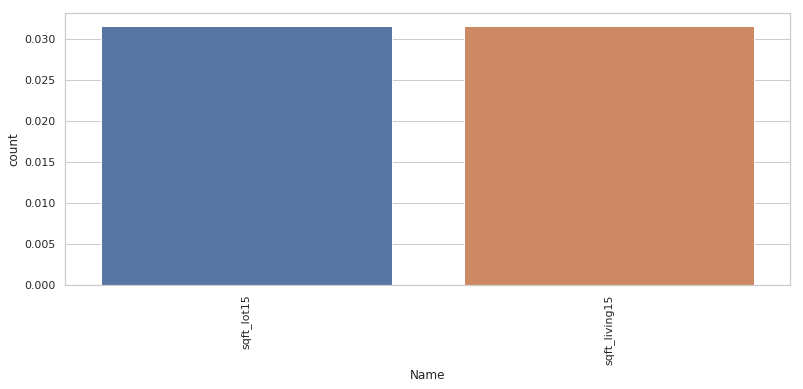

In [11]:
Isnull = Isnull.to_frame()
Isnull.columns = ['count']
Isnull.index.names = ['Name']
Isnull['Name'] = Isnull.index

plt.figure(figsize=(13, 5))
sns.set(style='whitegrid')
sns.barplot(x='Name', y='count', data=Isnull)
plt.xticks(rotation = 90)
plt.show()

Karena persentase data kosong terhadap data keseluruhan cukup kecil, kita bisa hapus baris yang terdapat nilai kosong

In [0]:
df.dropna(inplace=True)

Kita bisa memastikan sekali lagi bahwa tidak ada data yang kosong

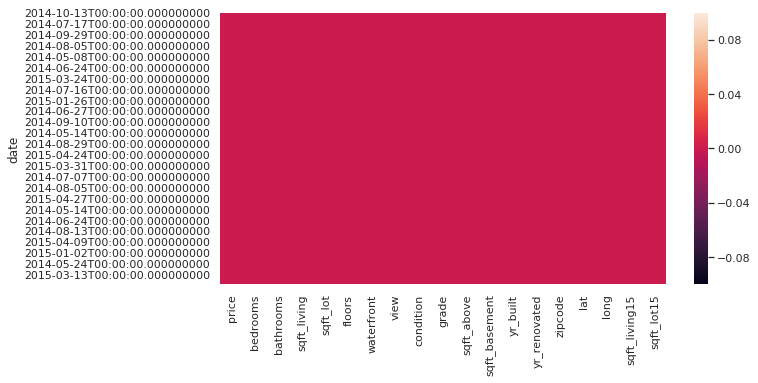

In [13]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull())

*Great!* Sampai disini tidak ada data yang kosong, namun kita perlu hati-hati apakah data berisi nilai 0 atau tidak, dan apa maksudnya. Mari kita tampilkan jumlah data yang bernilai 0 berdasarkan fiturnya

In [14]:
(df == 0).sum(axis=0)

price               0
bedrooms            2
bathrooms           3
sqft_living         0
sqft_lot            0
floors              0
waterfront       3133
view             2839
condition           0
grade               0
sqft_above          0
sqft_basement    1888
yr_built            0
yr_renovated     3014
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Fitur bedrooms, bathrooms, waterfront, view dan sqft_basement memiliki data yang bernilai 0, namun data ini saling berkaitan dengan data yang lain pada fitur tersebut, sedangkan nilai 0 pada fitur yr_renovated berarti tidak ada perenovasian pada rumah. Untuk menghindari bias, kita hapus saja fitur yr_renovated





In [0]:
df.drop(['yr_renovated'], axis=1, inplace=True)

Untuk melihat korelasi atau pengaruh masing-masing fitur terhadap satu sama lain, kita bisa tampilkan dalam heatmap

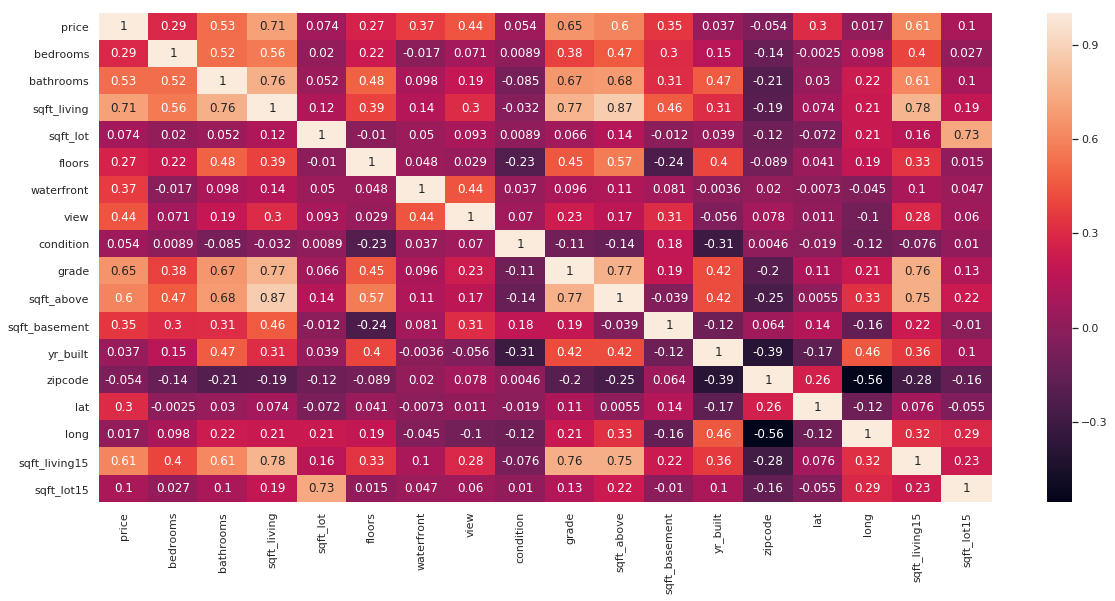

In [16]:
corr = df.corr()
plt.subplots(figsize=(20,9))
sns.heatmap(corr, annot=True)

Secara spesifik, kita ingin mengetahui korelasi masing-masing fitur terhadap harga

In [17]:
corr.sort_values(['price'], ascending=False, inplace=True)
corr.price

price            1.000000
sqft_living      0.705048
grade            0.654124
sqft_living15    0.607973
sqft_above       0.599095
bathrooms        0.525509
view             0.443541
waterfront       0.366537
sqft_basement    0.348599
lat              0.301254
bedrooms         0.292742
floors           0.266338
sqft_lot15       0.100527
sqft_lot         0.074333
condition        0.053536
yr_built         0.037051
long             0.017090
zipcode         -0.053987
Name: price, dtype: float64

Dari sini, kita bisa menentukan fitur mana saja yang akan digunakan. 
Fitur zipcode memiliki korelasi yang sangat kecil terhadap harga, sehingga bisa kita hapus.

In [0]:
df.drop(['zipcode'], axis=1, inplace=True)

## Training Time

In [0]:
X = df.drop(["price"], axis=1).values
y = df['price'].values

Selanjutnya lakukan normalisasi data

In [0]:
from sklearn import preprocessing

X = preprocessing.StandardScaler().fit(X).transform(X)

Kita bagi data ke dalam data latih dan data tes

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

Pada percobaan kali ini, kita gunakan 3 model yang berbeda, Linear Regression, Random Forest dan Gradient Boosting

### Linear Regression

In [0]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()

Untuk simplicity, kita bisa langsung fit model dengan parameter default

In [23]:
LR.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
print("Akurasi:", LR.score(X_test, y_test)*100)

Akurasi: 75.05504300783113


### Random Forest

In [0]:
from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor(n_estimators=1000)

In [26]:
RFR.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [27]:
print("Akurasi:", RFR.score(X_test, y_test)*100)

Akurasi: 84.30483094730016


### Gradient Boosting

In [0]:
from sklearn.ensemble import GradientBoostingRegressor

GBR = GradientBoostingRegressor(n_estimators=100, max_depth=4)

In [29]:
GBR.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [30]:
print("Akurasi:", GBR.score(X_test, y_test)*100)

Akurasi: 86.655753427337


Kita bisa mengubah parameter-parameter model untuk mendapatkan nilai akurasi yang lebih tinggi.